In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("shipwrecks.csv")
df.head()


Matplotlib is building the font cache; this may take a moment.


,Wreck ID,Strauss ID,Name,Parker Number,Sea area,Country,Region,Latitude,Longitude,Min depth,...,Columns etc,Sarcophagi,Blocks,Marble type,Other cargo,Hull remains,Shipboard paraphernalia,Ship equipment,Estimated tonnage,Amphora type
0,1,331,Komiza,NaN,Adriatic,Croatia,Vis Island,43.03333,16.08333,30.0,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,328,Lokunji,NaN,Adriatic,Croatia,Kvarner region,44.70000,14.28333,4.0,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,329,Maharac Cape,NaN,Adriatic,Croatia,Mljet island,42.73333,17.66666,3.0,...,False,False,False,NaN,Eastern coarse ware pottery of biconical dishe...,NaN,NaN,NaN,NaN,NaN
3,4,330,Mlin,702,Adriatic,Croatia,Split channel,43.45000,16.23333,25.0,...,False,False,False,NaN,NaN,Remains of the hull.,NaN,"Two lead anchor stocks, though possibly not fr...",NaN,NaN
4,5,322,Plavac B,832,Adriatic,Croatia,"Zlarin Island, central Dalmatia",NaN,NaN,NaN,...,False,False,False,NaN,NaN,NaN,NaN,.,NaN,NaN


In [2]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1784 entries, 0 to 1783
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Wreck ID                 1784 non-null   int64  
 1   Strauss ID               1784 non-null   int64  
 2   Name                     1784 non-null   object 
 3   Parker Number            1259 non-null   object 
 4   Sea area                 572 non-null    object 
 5   Country                  916 non-null    object 
 6   Region                   739 non-null    object 
 7   Latitude                 1601 non-null   float64
 8   Longitude                1603 non-null   float64
 9   Min depth                607 non-null    float64
 10  Max depth                608 non-null    float64
 11  Depth                    583 non-null    object 
 12  Period                   754 non-null    object 
 13  Dating                   767 non-null    object 
 14  Earliest date           

,Wreck ID,Strauss ID,Latitude,Longitude,Min depth,Max depth,Earliest date,Latest date,Date range,Mid point of date range,Probability,Estimated tonnage
count,1784.000000,1784.000000,1601.000000,1603.000000,607.000000,608.000000,1717.000000,1718.000000,1571.0,1571.0,1571.0,420.000000
mean,7231.577915,28.369955,9.311410,2.727527,31.454695,34.093750,29.699476,178.296857,0.0,0.0,0.0,8.530952
std,2668.234246,94.787597,17.390313,5.930707,95.663744,97.733657,406.783822,437.053341,0.0,0.0,0.0,40.192098
min,1.000000,0.000000,0.000000,-1.275780,0.000000,0.000000,-2500.000000,-2190.000000,0.0,0.0,0.0,0.000000
25%,7584.500000,0.000000,0.000000,0.000000,0.000000,0.000000,-150.000000,-50.000000,0.0,0.0,0.0,0.000000
50%,8093.500000,0.000000,0.000000,0.000000,6.000000,8.000000,-15.000000,100.000000,0.0,0.0,0.0,0.000000
75%,8587.500000,0.000000,0.000000,0.000000,27.500000,35.000000,175.000000,400.000000,0.0,0.0,0.0,0.000000
max,9063.000000,503.000000,45.716660,34.916660,1000.000000,1000.000000,1500.000000,1800.000000,0.0,0.0,0.0,400.000000


In [3]:
df.isnull().mean().sort_values(ascending=False)


Amphora type               0.993834
Marble type                0.958520
Shipboard paraphernalia    0.899664
Ship equipment             0.890135
Hull remains               0.861547
Place of destination       0.854260
Other cargo                0.844170
Place of origin            0.811099
Estimated tonnage          0.764574
Sea area                   0.679372
Depth                      0.673206
Comments                   0.670404
Min depth                  0.659753
Max depth                  0.659193
Region                     0.585762
Period                     0.577354
Dating                     0.570067
Reference                  0.556614
Country                    0.486547
Parker Number              0.294283
Date range                 0.119395
Mid point of date range    0.119395
Probability                0.119395
Latitude                   0.102578
Longitude                  0.101457
Earliest date              0.037556
Latest date                0.036996
Name                       0

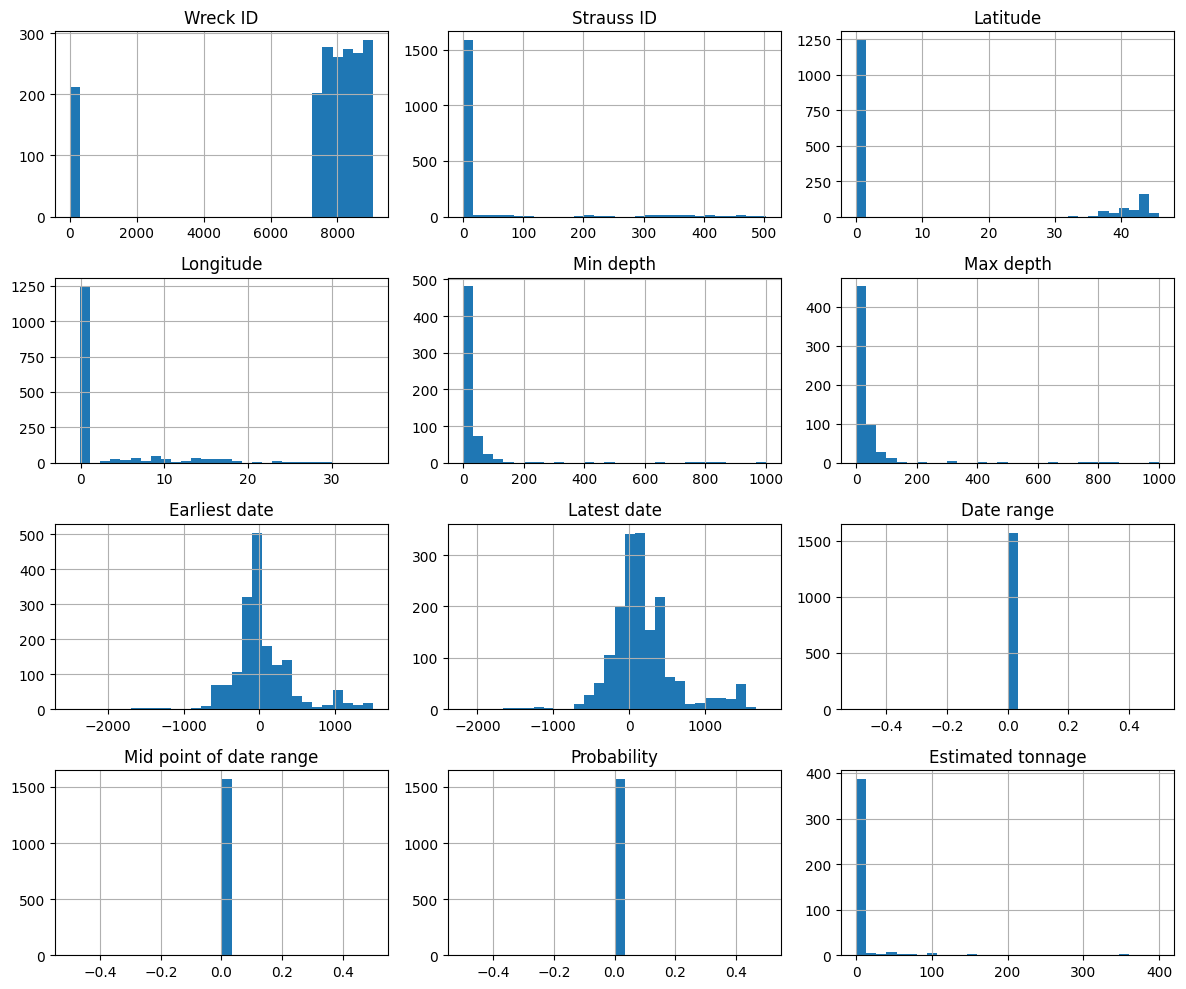

In [4]:
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()


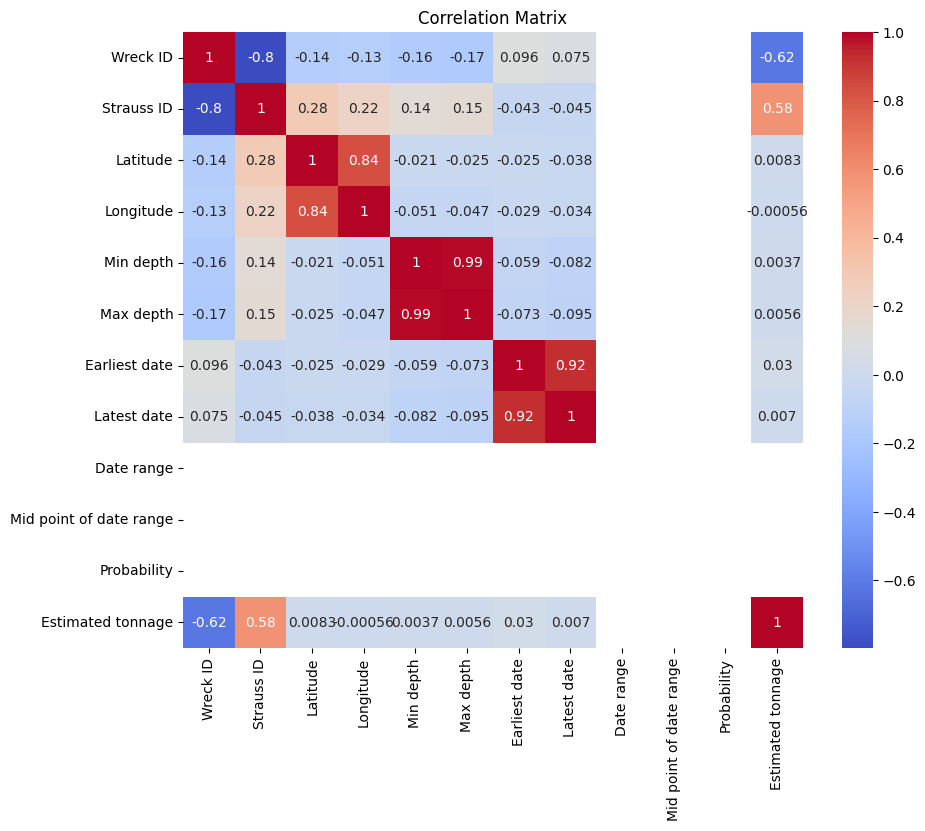

In [6]:
plt.figure(figsize=(10, 8))
# sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


# DATA CLEANING

In [14]:
df["Depth"].dtype

dtype('O')

In [16]:
# Drop duplicates
df = df.drop_duplicates()

# Example: remove rows where depth (target) is missing
df["Depth"] = pd.to_numeric(df["Depth"], errors="coerce")

df = df.dropna(subset=["Depth"])

# Fill remaining NaNs with numeric medians
df = df.fillna(df.median(numeric_only=True))

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 139 to 1696
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Wreck ID                 20 non-null     int64  
 1   Strauss ID               20 non-null     int64  
 2   Name                     20 non-null     object 
 3   Parker Number            7 non-null      object 
 4   Sea area                 12 non-null     object 
 5   Country                  19 non-null     object 
 6   Region                   8 non-null      object 
 7   Latitude                 20 non-null     float64
 8   Longitude                20 non-null     float64
 9   Min depth                20 non-null     float64
 10  Max depth                20 non-null     float64
 11  Depth                    20 non-null     float64
 12  Period                   19 non-null     object 
 13  Dating                   19 non-null     object 
 14  Earliest date            20 n

# REGRESSION MODELING

In [17]:
from sklearn.model_selection import train_test_split

# Select features
X = df.select_dtypes(include=np.number).drop(columns=["Depth"])
y = df["Depth"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
X.columns
# example_ship = pd.DataFrame([X.mean()])


In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)


In [21]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("R²:", r2_score(y_test, preds))
rmse = mean_squared_error(y_test, preds) ** 0.5
print("RMSE:", rmse)
# print("RMSE:", mean_squared_error(y_test, preds, squared=False))
print("MAE:", mean_absolute_error(y_test, preds))


R²: 0.4484243215445448
RMSE: 20.103907042866936
MAE: 14.651658941073993


# SCenario prediction

In [33]:
# example_ship = pd.DataFrame({
#     "ship_length": [40],
#     "ship_width": [9],
#     "cargo_weight_tonnes": [250],
#     "latitude": [37.2],
#     "longitude": [15.0],
#     # add any required fields
# })

example_ship = pd.DataFrame([X.mean()])
example_ship.loc[0, "Latitude"] = 50
example_ship.loc[0, "Longitude"] = 15.0
example_ship.loc[0, "Estimated tonnage"] = 300
example_ship.loc[0, "Min depth"] = 10
example_ship.loc[0, "Max depth"] = 20

# example_ship

model.predict(example_ship)


array([-46.78504348])

In [34]:
df["Depth"].describe()


count     20.000000
mean      52.650000
std       42.564224
min        3.000000
25%       20.000000
50%       46.000000
75%       78.000000
max      140.000000
Name: Depth, dtype: float64